# Data analysis and processing for cityscape segmentation dataset

# Raw cityscape dataste

## Path setup

In [1]:
import os
from pathlib import Path

root = Path("data/cityscapes")

left_dir = root / "leftImg8bit_trainvaltest" / "leftImg8bit"
gt_dir = root / "gtFine_trainvaltest" / "gtFine"

print(left_dir)
print(gt_dir)

data/cityscapes/leftImg8bit_trainvaltest/leftImg8bit
data/cityscapes/gtFine_trainvaltest/gtFine


## Number of pictures in train/val/test

In [2]:
def count_images(path):
    total = 0
    cities = list(path.glob("*"))
    for city in cities:
        total += len(list(city.glob("*.png")))
    return total

for split in ["train", "val", "test"]:
    count = count_images(left_dir / split)
    print(f"{split}: {count} images")


train: 2975 images
val: 500 images
test: 1525 images


In [3]:
from collections import Counter

city_counts = Counter()

train_cities = sorted((left_dir / "train").glob("*"))

for city in train_cities:
    imgs = list(city.glob("*.png"))
    city_counts[city.name] = len(imgs)

city_counts


Counter({'strasbourg': 365,
         'bremen': 316,
         'hamburg': 248,
         'dusseldorf': 221,
         'hanover': 196,
         'stuttgart': 196,
         'aachen': 174,
         'cologne': 154,
         'tubingen': 144,
         'weimar': 142,
         'zurich': 122,
         'jena': 119,
         'erfurt': 109,
         'krefeld': 99,
         'bochum': 96,
         'ulm': 95,
         'monchengladbach': 94,
         'darmstadt': 85,
         '.DS_Store': 0})

## Check for missing masks

In [4]:
missing_masks = []

for city in train_cities:
    for img_path in city.glob("*_leftImg8bit.png"):
        mask_path = (
            gt_dir / "train" / city.name / img_path.name.replace("_leftImg8bit", "_gtFine_labelIds")
        )
        if not mask_path.exists():
            missing_masks.append((img_path, mask_path))

print("Missing masks:", len(missing_masks))


Missing masks: 0


## Picture resolution

In [5]:
from PIL import Image

sizes = set()

for city in train_cities:
    img_files = list(city.glob("*.png"))
    for img_path in img_files:
        sizes.add(Image.open(img_path).size)

print("Unique image sizes:", sizes)


Unique image sizes: {(2048, 1024)}


## Preview of dataset

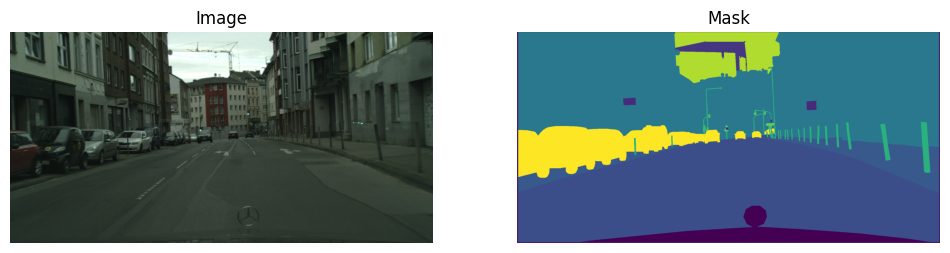

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sample_img_path = None

for city in train_cities:
    imgs = list(city.glob("*_leftImg8bit.png"))
    if imgs:
        sample_img_path = imgs[0]
        break

if sample_img_path is None:
    raise ValueError("No images found in any train city folder!")

img = np.array(Image.open(sample_img_path))
mask_path = gt_dir / "train" / sample_img_path.parent.name / sample_img_path.name.replace("_leftImg8bit.png", "_gtFine_labelIds.png")
mask = np.array(Image.open(mask_path))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(mask)
plt.axis("off")
plt.show()


# Subset creation
Original raw cityscape dataset is too big for this project - we selected random subset to make the project easier

In [7]:
from utils.create_subset import make_subset

make_subset(
    cityscapes_root="data/cityscapes",
    output_root="data/mini-cityscape",
    train_size=500,
    val_size=100
)

train: 500 images copied to data/mini-cityscape/train/input and data/mini-cityscape/train/masks
val: 100 images copied to data/mini-cityscape/val/input and data/mini-cityscape/val/masks


In [ ]:
"""
placeholder for augumentation code (use the file in utils/augument_subset.py) thx
"""
from utils.augument_subset import augument_subset

augument_subset()

# Data analysis of subset

In [9]:
"""
Data analysis of subset, kinda similar to what is done in this file above or what we did in kitti_processing.ipynb 

feel free to use that and then delete it, we use only this
"""

'\nData analysis of subset, kinda similar to what is done in this file above or what we did in kitti_processing.ipynb \n\nfeel free to use that and then delete it, we use only this\n'